For this problem, your task will be to implement the K-means clustering
algorithm and try it on a provided toy (but interesting) dataset (kmeans data.txt) consisting of points in
two dimensions. The provided dataset also has 2 clusters (so you would use K = 2). However, the data is such
that the standard K-means will NOT work well since the clusters are not spherical and not separable linearly
(you can check this by plotting the data in 2D using a scatter plot). You will consider two ways to handle this
issue.

### Using Hand-crafted Features

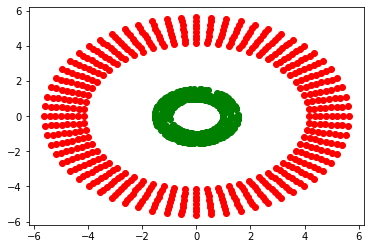

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def predict_cluster(x, u):
    d = np.square(x-u.T)
    c = np.argmin(d, axis=1).reshape(-1,1)
    return c

def update_mean(x,c):
    u = np.zeros((2, x.shape[1]))
    u[0,:] = np.mean(x[c==0], axis=0)
    u[1,:] = np.mean(x[c==1], axis=0)
    return u

data = np.genfromtxt("kmeans_data.txt")
tr_data = np.sum(np.square(data), axis = 1).reshape(-1,1) #feature transformation
u = tr_data[:2,:] # initializing mean of the clusters 

for i in range(10):
    c = predict_cluster(tr_data,u)
    u = update_mean(tr_data, c)
    p = (c==1).reshape(c.shape[0])
    n = (c==0).reshape(c.shape[0])
    
plt.scatter(data[p,0], data[p,1], c='r')
plt.scatter(data[n,0], data[n,1], c='g')
plt.show()

### Using Kernels: 

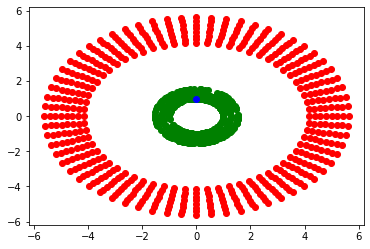

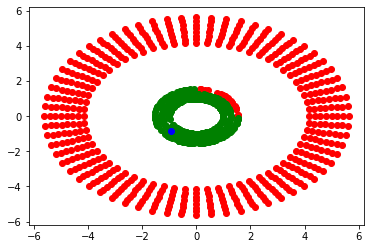

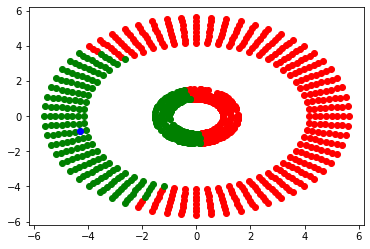

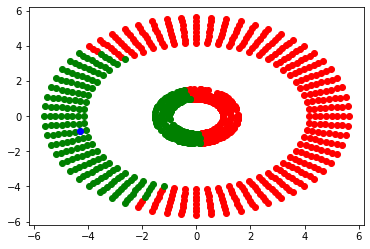

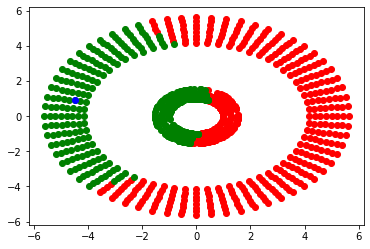

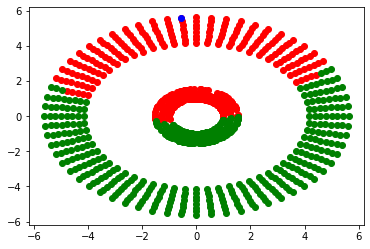

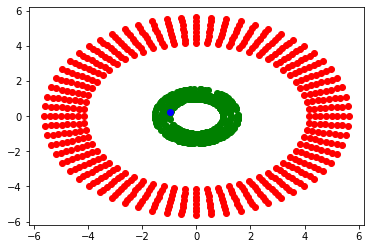

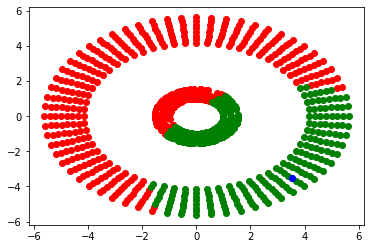

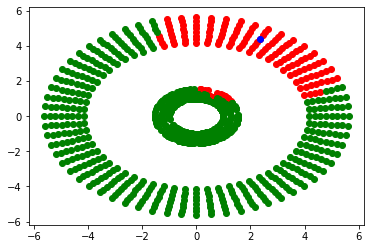

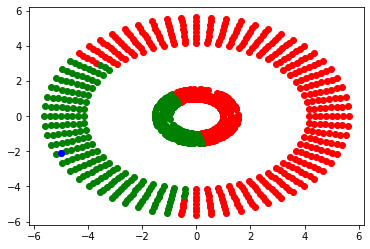

In [133]:
def transform_input(x,z):   
    return np.exp(-0.1*np.sum(np.square(x - x[z,:]), axis=1)).reshape(-1,1)


for i in range(10):
    k = int((np.random.randint(250, size=1)).reshape(()))
    new_data = transform_input(data,k)
    u = new_data[:2,:] 
    c = predict_cluster(new_data,u)
    c1 = (c==1).reshape(c.shape[0])
    c2 = (c==0).reshape(c.shape[0])
    plt.scatter(data[c1,0], data[c1,1], c='r')
    plt.scatter(data[c2,0], data[c2,1], c='g')
    plt.scatter(data[k,0], data[k,1], c='b')
    plt.show()
